In [133]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy.stats import ttest_ind
import statsmodels.api as sm


In [134]:
df = pd.read_csv("pisa2009train.csv")


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  3663 non-null   int64  
 1   male                   3663 non-null   int64  
 2   raceeth                3628 non-null   object 
 3   preschool              3607 non-null   float64
 4   expectBachelors        3601 non-null   float64
 5   motherHS               3566 non-null   float64
 6   motherBachelors        3266 non-null   float64
 7   motherWork             3570 non-null   float64
 8   fatherHS               3418 non-null   float64
 9   fatherBachelors        3094 non-null   float64
 10  fatherWork             3430 non-null   float64
 11  selfBornUS             3594 non-null   float64
 12  motherBornUS           3592 non-null   float64
 13  fatherBornUS           3550 non-null   float64
 14  englishAtHome          3592 non-null   float64
 15  comp

In [136]:
df.isnull().sum()


grade                      0
male                       0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64

In [137]:
df_clean = df.dropna()


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  3663 non-null   int64  
 1   male                   3663 non-null   int64  
 2   raceeth                3628 non-null   object 
 3   preschool              3607 non-null   float64
 4   expectBachelors        3601 non-null   float64
 5   motherHS               3566 non-null   float64
 6   motherBachelors        3266 non-null   float64
 7   motherWork             3570 non-null   float64
 8   fatherHS               3418 non-null   float64
 9   fatherBachelors        3094 non-null   float64
 10  fatherWork             3430 non-null   float64
 11  selfBornUS             3594 non-null   float64
 12  motherBornUS           3592 non-null   float64
 13  fatherBornUS           3550 non-null   float64
 14  englishAtHome          3592 non-null   float64
 15  comp

In [139]:
df.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


In [140]:
encoder = LabelEncoder()
df['raceeth_encoded'] = encoder.fit_transform(df['raceeth'])
print(df)


      grade  male   raceeth  preschool  expectBachelors  motherHS  \
0        11     1       NaN        NaN              0.0       NaN   
1        11     1     White        0.0              0.0       1.0   
2         9     1     White        1.0              1.0       1.0   
3        10     0     Black        1.0              1.0       0.0   
4        10     1  Hispanic        1.0              0.0       1.0   
...     ...   ...       ...        ...              ...       ...   
3658      9     1     White        0.0              1.0       1.0   
3659      9     1     White        0.0              0.0       1.0   
3660     10     1  Hispanic        1.0              1.0       1.0   
3661     11     1     Black        0.0              0.0       1.0   
3662     10     0     White        0.0              1.0       1.0   

      motherBachelors  motherWork  fatherHS  fatherBachelors  ...  \
0                 NaN         1.0       NaN              NaN  ...   
1                 1.0         1.0

In [141]:
df.isnull().sum()

grade                      0
male                       0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
raceeth_encoded            0
dtype: int64

In [142]:
df_clean_rows = df.dropna()


In [143]:
df.fillna(0, inplace=True)
print(df.isnull().sum())


grade                    0
male                     0
raceeth                  0
preschool                0
expectBachelors          0
motherHS                 0
motherBachelors          0
motherWork               0
fatherHS                 0
fatherBachelors          0
fatherWork               0
selfBornUS               0
motherBornUS             0
fatherBornUS             0
englishAtHome            0
computerForSchoolwork    0
read30MinsADay           0
minutesPerWeekEnglish    0
studentsInEnglish        0
schoolHasLibrary         0
publicSchool             0
urban                    0
schoolSize               0
readingScore             0
raceeth_encoded          0
dtype: int64


In [144]:
df.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore,raceeth_encoded
0,11,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,225.0,0.0,1.0,1,1,673.0,476.00,7
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01,6
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81,6
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11,2
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89,3


In [145]:
df['readingScore'].describe()

count    3663.000000
mean      497.911403
std        95.515153
min       168.550000
25%       431.705000
50%       499.660000
75%       566.230000
max       746.000000
Name: readingScore, dtype: float64

In [146]:
df['readingScore'].isnull().sum()

0

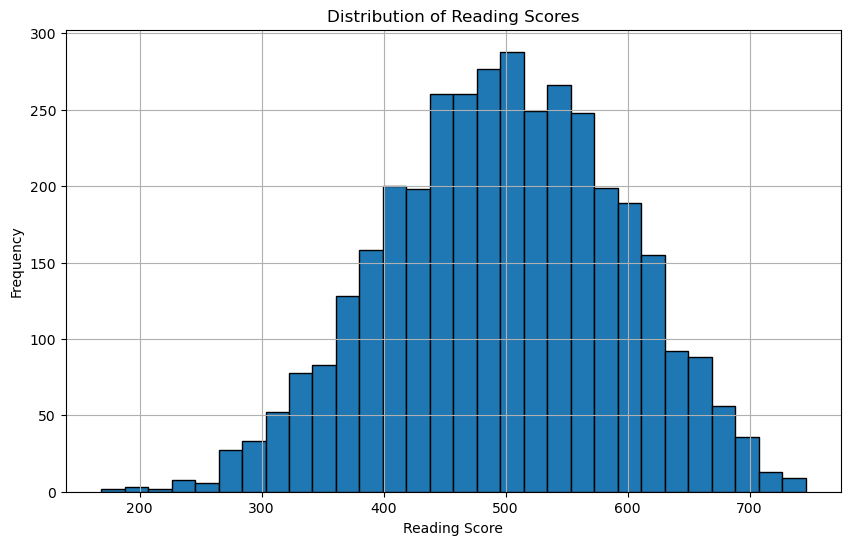

In [147]:

df['readingScore'].hist(bins=30, edgecolor='black', figsize=(10,6))

plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')

plt.show()

In [148]:
df['minutesPerWeekEnglish'].describe()

count    3663.000000
mean      252.690691
std       155.954073
min         0.000000
25%       210.000000
50%       250.000000
75%       294.500000
max      2400.000000
Name: minutesPerWeekEnglish, dtype: float64

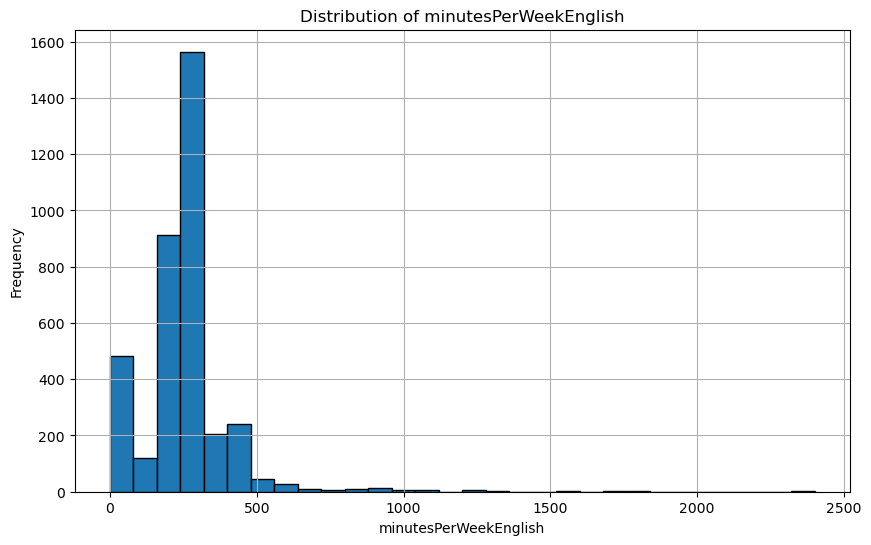

In [149]:
df['minutesPerWeekEnglish'].hist(bins=30,edgecolor='black', figsize = (10,6))
plt.title('Distribution of minutesPerWeekEnglish')
plt.xlabel('minutesPerWeekEnglish')
plt.ylabel('Frequency')
plt.show()

In [150]:
df['englishAtHome'].describe()

count    3663.000000
mean        0.854764
std         0.352387
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: englishAtHome, dtype: float64

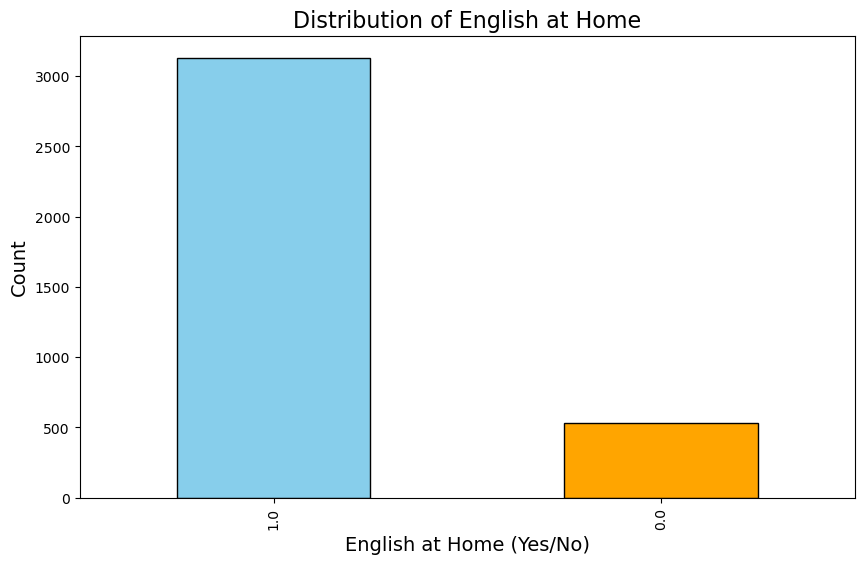

In [151]:

df['englishAtHome'].value_counts().plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black', figsize=(10,6))

plt.title('Distribution of English at Home', fontsize=16)
plt.xlabel('English at Home (Yes/No)', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()


In [152]:
correlation_matrix = df.select_dtypes(include='number').corr()

sorted_correlation = correlation_matrix['readingScore'].sort_values(ascending=False)

print(sorted_correlation)


readingScore             1.000000
expectBachelors          0.365702
grade                    0.286752
fatherBachelors          0.276171
raceeth_encoded          0.265196
read30MinsADay           0.249544
motherBachelors          0.231909
fatherHS                 0.224352
computerForSchoolwork    0.207091
motherHS                 0.190285
studentsInEnglish        0.177582
schoolHasLibrary         0.148650
englishAtHome            0.148304
minutesPerWeekEnglish    0.142087
fatherWork               0.132958
fatherBornUS             0.120878
motherBornUS             0.080956
motherWork               0.068645
selfBornUS               0.065170
preschool                0.055842
schoolSize               0.055421
urban                   -0.064194
publicSchool            -0.133654
male                    -0.153928
Name: readingScore, dtype: float64


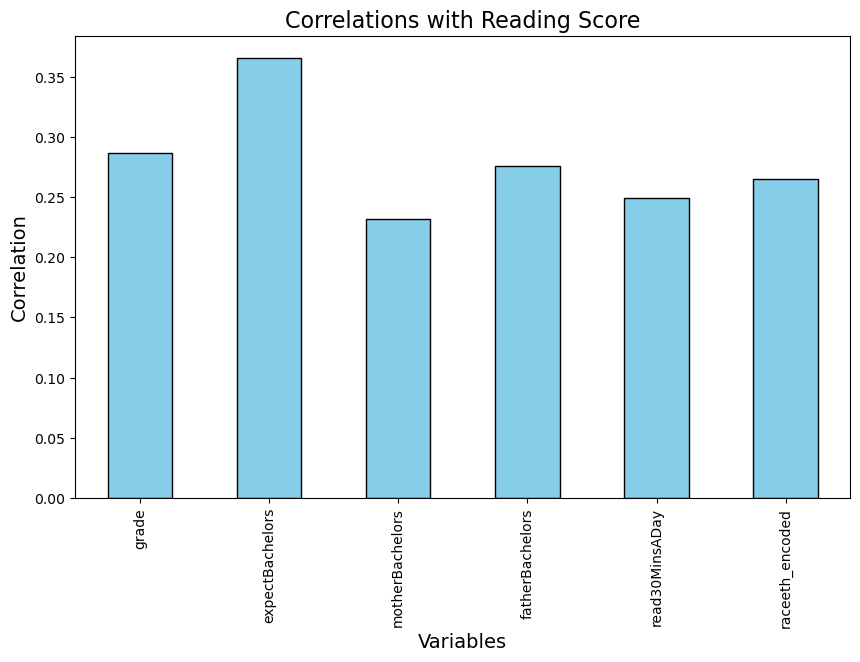

In [153]:
positive_variables = ['grade', 'expectBachelors', 'motherBachelors', 'fatherBachelors', 'read30MinsADay', 'raceeth_encoded']
correlations = df[positive_variables + ['readingScore']].corr()['readingScore'][positive_variables]

plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Correlations with Reading Score', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Correlation', fontsize=14)

plt.show()


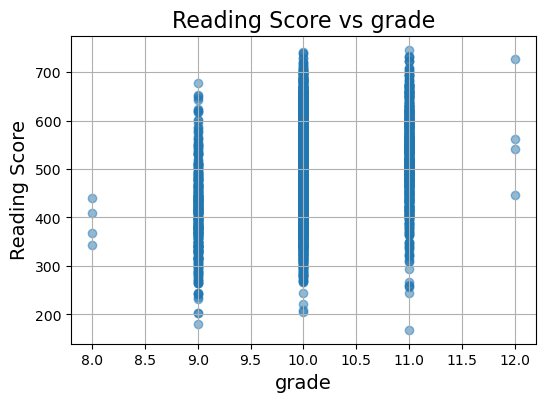

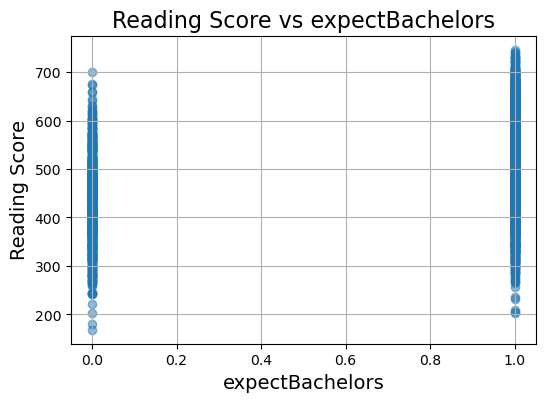

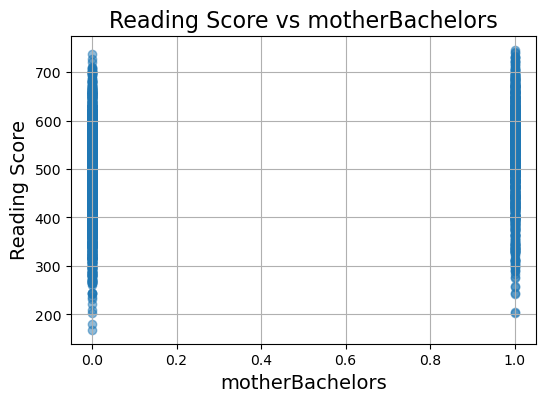

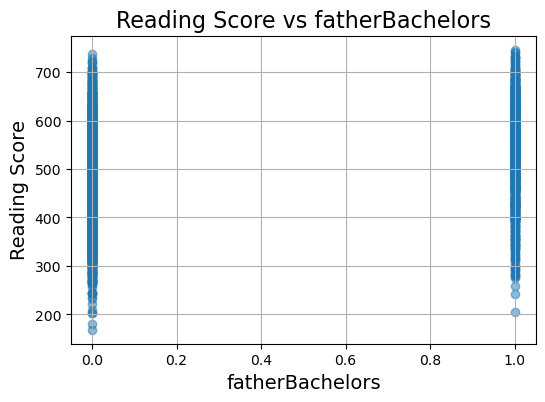

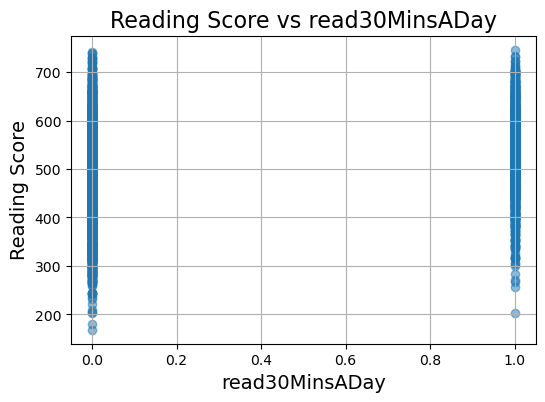

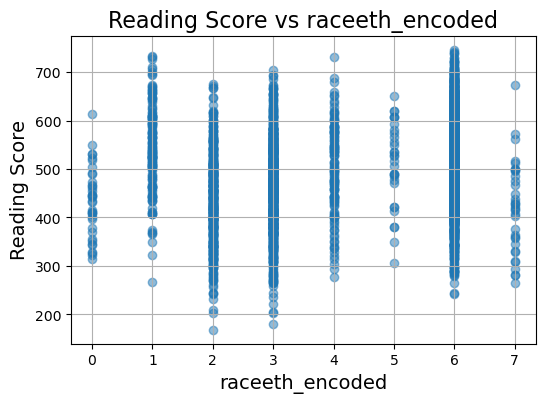

In [154]:
import matplotlib.pyplot as plt

positive_variables = ['grade', 'expectBachelors', 'motherBachelors', 'fatherBachelors', 'read30MinsADay', 'raceeth_encoded']

for variable in positive_variables:
    plt.figure(figsize=(6, 4))
    
    plt.scatter(df[variable], df['readingScore'], alpha=0.5)
    
    plt.title(f'Reading Score vs {variable}', fontsize=16)
    
    plt.xlabel(variable, fontsize=14)
    plt.ylabel('Reading Score', fontsize=14)
    
    plt.grid(True)
    
    plt.show()

In [155]:

df_clean = df.dropna(subset=['male', 'readingScore'])

group1 = df_clean[df_clean['male'] == 1]['readingScore']
group2 = df_clean[df_clean['male'] == 0]['readingScore']

t_stat, p_value = ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -9.425956203551202, P-value: 7.331466031209069e-21


In [156]:

df_clean = df.dropna(subset = ['motherBachelors','readingScore'])
group1 = df_clean[df_clean['motherBachelors']==1]['readingScore']
group2 = df_clean[df_clean['motherBachelors']==0]['readingScore']

t_stat, p_value = ttest_ind(group1, group2)
print(f"T=statistic: {t_stat}, P-value: {p_value}")

T=statistic: 14.425213626227913, P-value: 6.3786320812001566e-46


In [157]:
df_clean = df.dropna(subset = ['fatherBachelors', 'readingScore'])
group1 = df_clean[df_clean['fatherBachelors']==1]['readingScore']
group2 = df_clean[df_clean['fatherBachelors']==0]['readingScore']

t_stat, p_value= ttest_ind(group1, group2)
print(f"T=statistic: {t_stat}, P-value: {p_value}")

T=statistic: 17.38625551959578, P-value: 4.047658073647782e-65


In [158]:
import statsmodels.api as sm

X = df[['male', 'expectBachelors', 'motherBachelors', 'fatherBachelors', 'read30MinsADay', 'raceeth_encoded']]
Y = df['readingScore']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     236.9
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          2.23e-256
Time:                        09:44:15   Log-Likelihood:                -21296.
No. Observations:                3663   AIC:                         4.261e+04
Df Residuals:                    3656   BIC:                         4.265e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             381.9720      4.693     

In [159]:

print(model.conf_int())


                          0           1
const            372.770928  391.173021
male             -25.788784  -14.942670
expectBachelors   57.453740   70.457056
motherBachelors   10.599145   23.637049
fatherBachelors   22.082604   35.652479
read30MinsADay    32.867545   44.894861
raceeth_encoded   10.121650   13.100545
